### Multi-Layer Perceptron Model Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 9\\Data File\\meet_or_beat_US.csv")
df.head()

,EPS,forecasted_eps,noOfEsts,after_total_returns,before_total_returns
0,2.01,1.67,11,0.051444,0.018585
1,0.17,0.19,6,0.112955,-0.000510
2,-0.07,0.14,4,0.077167,-0.046104
3,0.48,0.51,8,-0.006130,-0.004899
4,-0.24,-0.27,9,0.089762,-0.025466


In [3]:
# Assigns quantile bins to the 'after_total_returns' column
df['after_total_returns_quantile'] = (pd.qcut(df['after_total_returns'], q = 5, labels = False)) + 1
df['after_total_returns_quantile'].value_counts() # Displays the count of rows in each quantile bin

after_total_returns_quantile
2    3369
4    3368
5    3368
1    3368
3    3366
Name: count, dtype: int64

In [4]:
y_quantile = df['after_total_returns_quantile'] # Save bucket value as the new target variable
number_of_classes = len(y_quantile.unique()) # Save the unique count of categories

In [5]:
# Encode quantiles into labels
encoder = LabelEncoder()
encoder.fit(y_quantile)
encoded_y = encoder.transform(y_quantile)

In [6]:
df.head()

,EPS,forecasted_eps,noOfEsts,after_total_returns,before_total_returns,after_total_returns_quantile
0,2.01,1.67,11,0.051444,0.018585,4
1,0.17,0.19,6,0.112955,-0.000510,5
2,-0.07,0.14,4,0.077167,-0.046104,5
3,0.48,0.51,8,-0.006130,-0.004899,3
4,-0.24,-0.27,9,0.089762,-0.025466,5


In [7]:
# Encode labels into categories
y_categorical = to_categorical(encoded_y, num_classes = number_of_classes)

In [8]:
# Specify predictor variables
X = df[['forecasted_eps', 'before_total_returns', 'noOfEsts', 'EPS']]
X.head(3)

,forecasted_eps,before_total_returns,noOfEsts,EPS
0,1.67,0.018585,11,2.01
1,0.19,-0.000510,6,0.17
2,0.14,-0.046104,4,-0.07


In [9]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state = 1)

In [10]:
# Save the count of unique predictor variables
number_of_predictors = len(X.columns)

In [11]:
# Build the Model
model = Sequential() # Initialize a Sequential model
model.add(Dense(10, input_dim = number_of_predictors, activation = 'tanh')) # Add a dense layer
model.add(Dropout(0.2, input_shape = (10,))) # Add a dropout layer
model.add(Dense(5, activation = 'relu')) # Add regularization to another dense layer
model.add(Dense(number_of_classes, activation = 'softmax')) # Add the output layer

# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['categorical_accuracy'])

# Summarise the model
model.summary()

c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135 (540.00 B)

 Trainable params: 135 (540.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
number_of_epochs = 3000
model.fit(X_train, y_train, epochs = number_of_epochs, batch_size = 70000, validation_split = 0.2, shuffle = True)

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - categorical_accuracy: 0.2089 - loss: 1.6422 - val_categorical_accuracy: 0.2067 - val_loss: 1.6181
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - categorical_accuracy: 0.2082 - loss: 1.6424 - val_categorical_accuracy: 0.2063 - val_loss: 1.6169
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - categorical_accuracy: 0.2096 - loss: 1.6354 - val_categorical_accuracy: 0.2055 - val_loss: 1.6157
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - categorical_accuracy: 0.2156 - loss: 1.6319 - val_categorical_accuracy: 0.2059 - val_loss: 1.6145
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - categorical_accuracy: 0.2179 - loss: 1.6331 - val_categorical_accuracy: 0.2055 - val_loss: 1.6133
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - categorical_accuracy: 0.2124 - loss: 1.6327 - val_categorical_accuracy: 0.2039 - val_loss: 1.6122
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - categorical_accuracy: 0.2175 - loss: 

In [13]:
# Save model history across epochs
model_history = model.history.history
model_history.keys()

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])

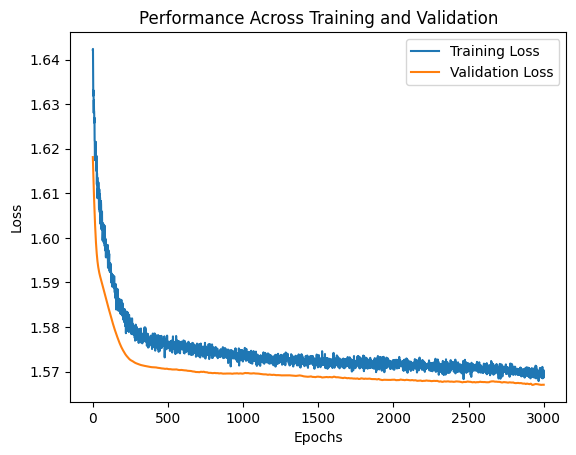

In [14]:
# Save accuracy for training and validation set across epochs
training_results = pd.DataFrame(index = range(1, number_of_epochs + 1))
training_results['Training'] = model_history['loss']
training_results['Validation'] = model_history['val_loss']

# Plotting the performance
training_results.plot(title = 'Performance Across Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

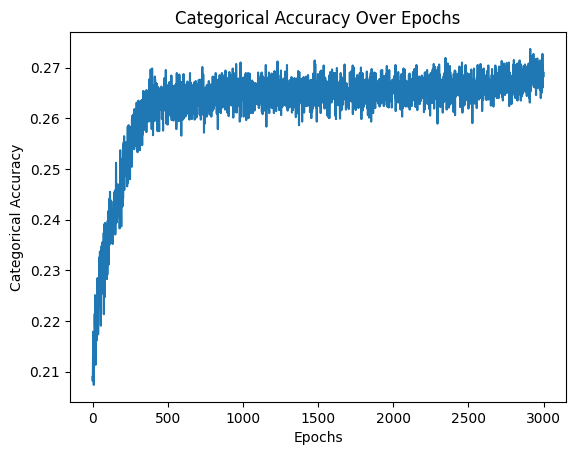

In [15]:
# Plotting the categorical accuracy
plt.plot(model_history['categorical_accuracy'])
plt.title('Categorical Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.show()

In [16]:
# Convert the one-hot encoded y_test labels into their corresponding class labels
y_test_labels = np.argmax(y_test, axis = 1)

# Use the trained model to predict the testing set
nn_pred = model.predict(X_test)
y_pred_labels = np.argmax(nn_pred, axis = 1) # Convert the predicted probabilities to class labels

# Print the classification report
print(classification_report(y_test_labels, y_pred_labels))

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.29      0.63      0.39       810
           1       0.20      0.06      0.09       894
           2       0.24      0.51      0.32       803
           3       0.27      0.09      0.14       848
           4       0.24      0.03      0.05       855

    accuracy                           0.26      4210
   macro avg       0.25      0.27      0.20      4210
weighted avg       0.25      0.26      0.20      4210

